# Example: Plotting Ocean Model Transects

#### Overview
In this notebook, we will examine the vertical structure of temperature and salinity in the ocean. As for previous examples, we will use output from the ECCO Ocean State Estimate (Version 4).

#### Import Modules
First, import the modules required to access data from netCDF files and plot it:


#### Import modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

#### &#x1F913; Getting Started - Try It Yourself
In lecture 2-1, we investigated the eastward and northward components of velocity in the ocean. Here we'll take a look at the temperature and salinity fields of the ocean. 

This example notebook has been provided with two files - `THETA_2015_12.nc` and `SALT_2015_12.nc` - which will be used for this visualization. Following the code from lecture 2-1, enter code below to visualize temperature and salinity at the ocean surface.

Begin by opening the datasets and reading in the data:

In [16]:
# read in the THETA and SALT files to xarray datasets
# note that these files must be in the same folder as this notebook
# hint: copy/paste code from the example shown on Tuesday and edit from there

# start by opening the data sets:
ds_theta = xr.open_dataset('THETA_2015_12.nc')
ds_salt = xr.open_dataset('SALT_2015_12.nc')

# then, store the THETA and SALT variables in numpy arrays
theta = np.array(ds_theta['THETA'])
salt = np.array(ds_salt['SALT'])

# in addition, make variables for longitude and latitude
lon = np.array(ds_theta['longitude'])
lat = np.array(ds_theta['latitude'])


Now, make a plot of the data with the temperature on the left and the salinity on the right. For data bounds and color maps, temperature will look reasonable with a `turbo` colormap in the range -2$^{\circ}$C to 30$^{\circ}$C; salinity will look reasonable with the default colormap with a range 32 to 37 psu. You may like to explore other colormaps provided by matplitlib [HERE](https://matplotlib.org/stable/gallery/color/colormap_reference.html) or by the cmocean package [HERE](https://matplotlib.org/cmocean/). Be sure to use a sequential map.

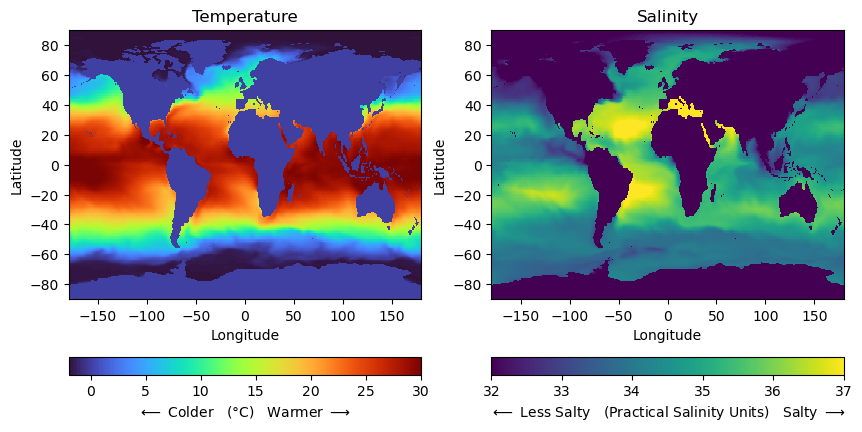

In [32]:
fig = plt.figure(figsize=(10,5))

# enter your plotting code here
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,theta[0, 0, :, :], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Colder   ($\degree$C)   Warmer $\longrightarrow$' )
plt.title('Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,salt[0, 0, :, :], vmin = 32, vmax=37)
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Less Salty   (Practical Salinity Units)   Salty $\longrightarrow$' )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Salinity');

#### &#x1F914; Check Your Understanding
Consider the following questions:
1. What are the warmest and coldest ocean temperatures, and where are they found?

According to the color map the colder ocean temperatures are located closer to the poles from the range going from -2 to 30 degrees C.

3. What are the freshest and saltiest ocean water,s and where are they found?

The freshest and saltiest ocean water's are located more towards the equator which makes sense since the hotter a water is, the more salt it can hold as a solvent, the further away the colder it gets, expelling the salt. It also has more evaporation so a greater concentration of salt will be left behind.

### Modifying Code to Plot Transects

In the plots above, you may have noticed that we put two 0's in the brackets when we plot the surface as follows:

```
theta[0, 0, :, :]
```

Let's take a look at the dataset to see why this is so:

In [34]:
ds_theta

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    longitude  (i) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 104MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 19:28:22 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [38]:
ds_salt

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    SALT       (time, k, j, i) float64 104MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 18:57:32 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

From here, we can see that we also have a variable for depth. Let's go ahead and read that in.

This is a 4d dataset.
Imagine a 5 by 5 grid
A[0,:] would be a row 0, all collumns at row 0 and it would output the whole row
A[:,0] would be all rows at COLLUMN 0 so it would output the whole collumn.
A[0,0,::] would be the first row, first collumn, then all the data there so we could see for theta it would be time and k then all data from the i and j's there.

In [35]:
Z = np.array(ds_theta['Z'])

In [40]:
lon[100]

-129.75

Now, we can plot the temperature along a transect:

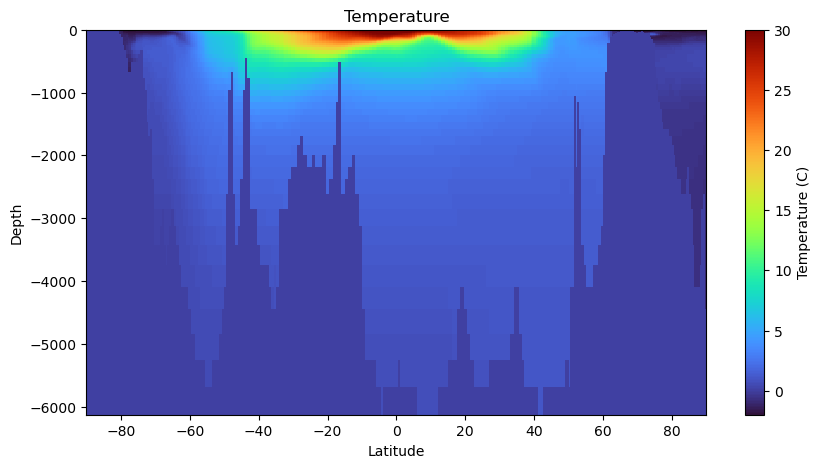

In [36]:
fig = plt.figure(figsize=(10,5))
C = plt.pcolormesh(lat,Z,theta[0, :, :, 0], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Latitude');

Using similar code, we can also plot salinity:

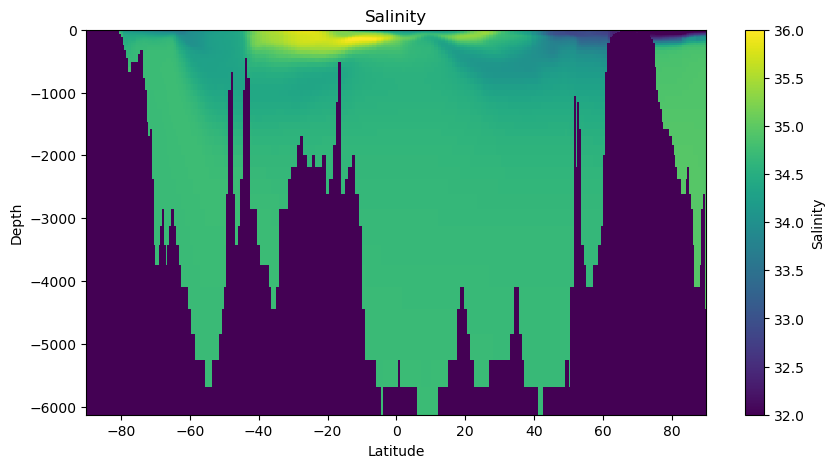

In [37]:
fig = plt.figure(figsize=(10,5))
C = plt.pcolormesh(lat,Z,salt[0, :, :, 0], vmin = 32, vmax=36, cmap='viridis')
plt.colorbar(C, label='Salinity' )
plt.title('Salinity')
plt.ylabel('Depth')
plt.xlabel('Latitude');

Salt water could mak the water heavier making at the poles the cold water to be at the top because of its freshness so despite cold water has to move down it actually stays up.
There's a small band of freshness at the equator because of its low pressure zone which leads to more storms for example that sends a lot of freshwater at the surface despite being a lot of evaporation.

